<a href="https://colab.research.google.com/github/DengChiung/kmuh20231206/blob/main/test_association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
#store_data = pd.read_csv('opopcode_list_dell.csv',encoding = 'big5-hkscs', dtype = str)
store_data = pd.read_csv('opopcode_list_dell19.csv',encoding = 'big5-hkscs', dtype = str)
store_data['opdept']=store_data['opdept'].str.zfill(4)
#store_data = pd.read_excel('opopcode_list_dell.xls',dtype={'opdept':str})
store_data=store_data[store_data['opdept']=='0270']#
store_data=store_data[['bopcode1','aopcode1','aopcode2','aopcode3','aopcode4']]
#store_data=store_data[['aopcode1','aopcode2','aopcode3','aopcode4']]
store_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bopcode1,aopcode1,aopcode2,aopcode3,aopcode4
1,60506512,69019B,60506522,NaN,NaN
32,48005C,62060B,NaN,NaN,NaN
53,62011C,64208C,NaN,NaN,NaN
56,62032B,62032B,62054B,62015B,NaN
63,48005C,62060B,NaN,NaN,NaN


In [71]:
unique_li = [store_data[col].unique().tolist() for col in store_data.columns]
items = set([item for item_li in unique_li for item in item_li if item is not np.NaN ])
#items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
#OneHotEncoding item_rows
encoded_vals = []

for index, row in store_data.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc_item in uncommons:
        labels[uc_item] = 0
    for com_item in commons:
        labels[com_item] = 1
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)
display(ohe_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,83088B,86810B,60505322,62069C,60506113,71020B,60505221,62014C,62054B,66017B,...,64245C,48005C,75602C,60504331,64198B,60505313,60505431,60506522,69019B,60506512
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#Apriori - Reduce the data
#最小支持度（min_support） 最小提昇度（min_lift）
#(min support) 定為 60%，即在所有交易中，該產品最少佔 60%，才可符合 frequent itemset 的要求
freq_items = apriori(ohe_df, min_support=0.02,use_colnames=True, verbose=1)
display(freq_items.head(5))
display(freq_items.tail(5))

Processing 30 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.049272,(60506113)
1,0.096305,(62054B)
2,0.136618,(64197C)
3,0.029115,(62047C)
4,0.067189,(62007C)


,support,itemsets
22,0.049272,"(48006C, 64197C)"
23,0.033595,"(48005C, 64197C)"
24,0.031355,"(62064C, 62007C)"
25,0.049272,"(48006C, 62060B)"
26,0.034714,"(62060B, 48005C)"


In [110]:
#Max, Min values of Support
display(freq_items.sort_values(by = 'support', ascending=False).head(10))
display(freq_items.sort_values(by = 'support', ascending=False).tail(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
13,0.297872,(48006C)
16,0.150056,(62060B)
2,0.136618,(64197C)
20,0.133259,(48005C)
1,0.096305,(62054B)
4,0.067189,(62007C)
15,0.050392,(62015B)
25,0.049272,"(48006C, 62060B)"
22,0.049272,"(48006C, 64197C)"
0,0.049272,(60506113)


,support,itemsets
26,0.034714,"(62060B, 48005C)"
7,0.034714,(64112B)
23,0.033595,"(48005C, 64197C)"
24,0.031355,"(62064C, 62007C)"
17,0.030235,(64025C)
18,0.030235,(62010C)
3,0.029115,(62047C)
21,0.024636,"(62054B, 62032B)"
8,0.024636,(62012C)
19,0.021277,(62025B)


In [111]:
#Association Rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2).sort_values(by = ['lift', 'confidence', 'support'], ascending =False)
print('rules.shape :', rules.shape)
display(rules.head(10))
display(rules.tail(10))

rules.shape : (10, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(62064C),(62007C),0.035834,0.067189,0.031355,0.875000,13.022917,0.028947,7.462486,0.957524
6,(62007C),(62064C),0.067189,0.035834,0.031355,0.466667,13.022917,0.028947,1.807811,0.989710
1,(62032B),(62054B),0.045913,0.096305,0.024636,0.536585,5.571753,0.020214,1.950080,0.860009
0,(62054B),(62032B),0.096305,0.045913,0.024636,0.255814,5.571753,0.020214,1.282055,0.907964
3,(48005C),(64197C),0.133259,0.136618,0.033595,0.252101,1.845295,0.015389,1.154409,0.528510
4,(64197C),(48005C),0.136618,0.133259,0.033595,0.245902,1.845295,0.015389,1.149374,0.530566
8,(62060B),(48005C),0.150056,0.133259,0.034714,0.231343,1.736047,0.014718,1.127605,0.498831
9,(48005C),(62060B),0.133259,0.150056,0.034714,0.260504,1.736047,0.014718,1.149356,0.489164
2,(64197C),(48006C),0.136618,0.297872,0.049272,0.360656,1.210773,0.008577,1.098200,0.201627
7,(62060B),(48006C),0.150056,0.297872,0.049272,0.328358,1.102345,0.004575,1.045390,0.109235


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(62064C),(62007C),0.035834,0.067189,0.031355,0.875000,13.022917,0.028947,7.462486,0.957524
6,(62007C),(62064C),0.067189,0.035834,0.031355,0.466667,13.022917,0.028947,1.807811,0.989710
1,(62032B),(62054B),0.045913,0.096305,0.024636,0.536585,5.571753,0.020214,1.950080,0.860009
0,(62054B),(62032B),0.096305,0.045913,0.024636,0.255814,5.571753,0.020214,1.282055,0.907964
3,(48005C),(64197C),0.133259,0.136618,0.033595,0.252101,1.845295,0.015389,1.154409,0.528510
4,(64197C),(48005C),0.136618,0.133259,0.033595,0.245902,1.845295,0.015389,1.149374,0.530566
8,(62060B),(48005C),0.150056,0.133259,0.034714,0.231343,1.736047,0.014718,1.127605,0.498831
9,(48005C),(62060B),0.133259,0.150056,0.034714,0.260504,1.736047,0.014718,1.149356,0.489164
2,(64197C),(48006C),0.136618,0.297872,0.049272,0.360656,1.210773,0.008577,1.098200,0.201627
7,(62060B),(48006C),0.150056,0.297872,0.049272,0.328358,1.102345,0.004575,1.045390,0.109235


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


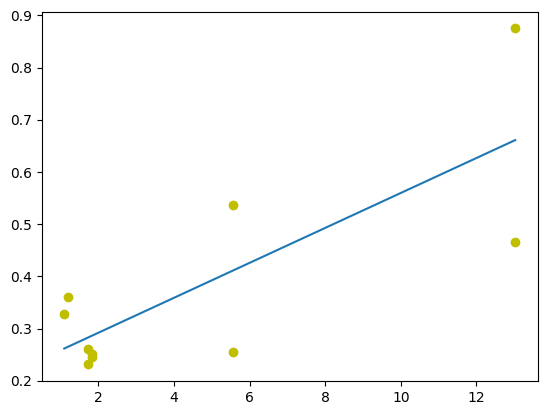

In [112]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

In [113]:
rules.iloc[0,0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset({'62064C'})

In [114]:
#rules[rules['antecedents']==frozenset({'500130'})].sort_values(by = 'lift', ascending = False)
rules[rules['antecedents']==frozenset({'62064C'})].sort_values(by = 'lift', ascending = False)#

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(62064C),(62007C),0.035834,0.067189,0.031355,0.875,13.022917,0.028947,7.462486,0.957524


In [116]:
rules[rules['antecedents']==frozenset({'62007C'})].sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(62007C),(62064C),0.067189,0.035834,0.031355,0.466667,13.022917,0.028947,1.807811,0.98971
